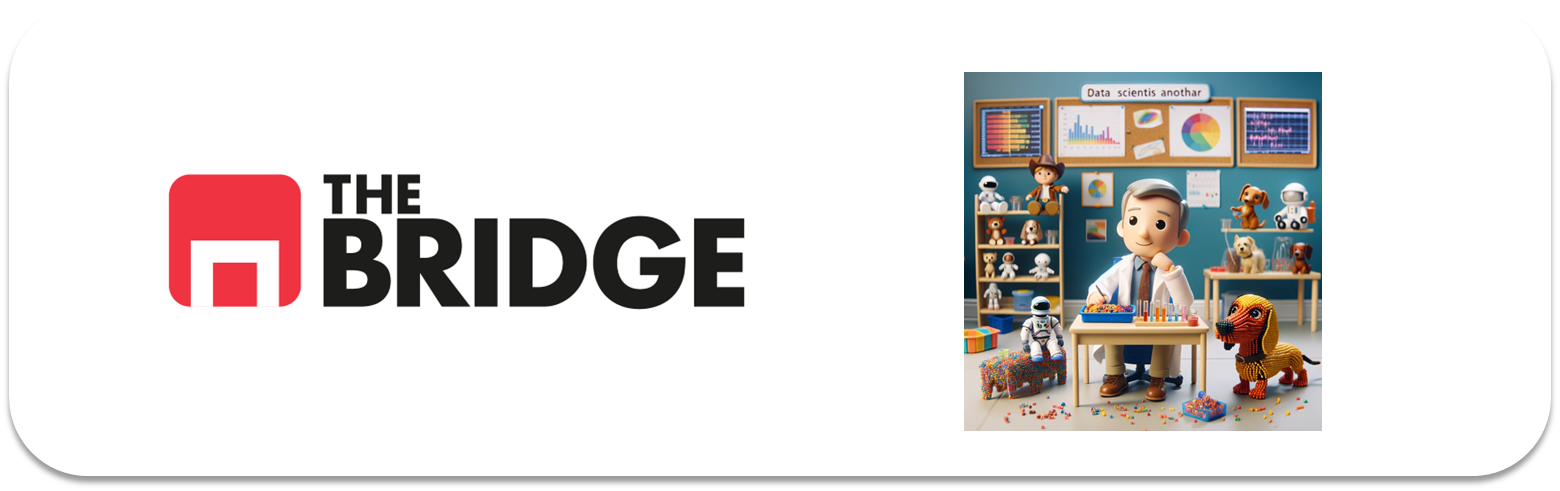

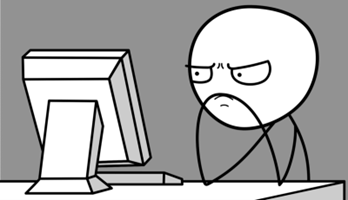

Para ejercitarte y afianzar lo aprendido sobre dispersión, distribución y outliers, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos se subirá a lo largo del sprint.

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Ejercicio 1

Carga en un dataframe los datos contenidos en la ruta "./data/car_crashes.csv", muestra un parte de su contenido y la info general del mismo

In [50]:
df_coches = pd.read_csv('./data/car_crashes.csv', index_col = 0, sep = '|')
df_coches.sample(10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
33,16.8,6.552,5.208,15.792,13.608,708.24,127.82,NC
28,14.7,5.439,4.704,13.965,14.553,1029.87,138.71,NV
37,12.8,4.224,3.328,8.576,11.520,804.71,104.61,OR


In [41]:
df_coches.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.6+ KB


### Ejercicio 2

Haz una pequeña descripción de lo que crees que puede representar cada una de las variables y de que puede representar el dataset. Aunque para algunas se proporciona aquí:

* "total" - Número de accidentes fatales por colisión de vehñculos por mil millones de millas
* "ins_premiums" - Prima media de Seguros de Automóviles (€)
* "ins_losses" - Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)

**ACLARACION IMPORTANTE**: El resto de columnas están dadas en las mismas unidades que total (numero de accidentes fatales por mil millones de millas)

* Total = Número de accidentes fatales por colisión de vehiculos por mil millones de millas
* speeding = Números de accidentes por exceso de velocidad
* alcohol = Números de accidentes por consumo de alcohol
* not_distracted = Números de accidentes que no son por algún factor extraordinario
* no_previous = Números de accidentes que no habían tenido accidentes antes, es decir es el primer accidente
* ins_premium = Prima media de Seguros de Automóviles en dólares
* ins_losses = Pérdidas incurridas por las compañías de seguros por colisiones por conductor asegurado ($)
* abbrev = Son estados de estados unidos

### Ejercicio 3

Vamos a analizar las medidas de tendencia central (media, mediana), las de posición (los cuartiles) y los rangos de las variables numéricas del dataset. Muestra esos valores para todas las variables numéricas del dataset.  

**IMPORTANTE**:
*Al ser los valores porcentajes, tenemos que convertirlos a valores absolutos (multiplicar los valores de las columnas de cada fila por el total de esa fila, excepto total) si queremos poder contabilizar medias reales entre todos los estados*  


In [42]:
columnas = df_coches.describe().columns.to_list()
columnas = [col for col in columnas if col not in ['total','ins_premium','ins_losses']]
columnas

['speeding', 'alcohol', 'not_distracted', 'no_previous']

In [51]:
for col in columnas:
    df_coches[col] = df_coches[col] * df_coches['total']

In [52]:
df_coches.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,137.8416,106.0320,339.3024,282.7520,784.55,145.08,AL
1,18.1,134.3201,81.9025,294.8490,307.9534,1053.48,133.93,AK
2,18.6,121.0860,96.8688,290.6064,332.1216,899.47,110.35,AZ
3,22.4,90.3168,130.4576,471.6544,476.6720,827.34,142.39,AR
4,12.0,50.4000,40.3200,131.0400,128.1600,878.41,165.63,CA


In [64]:
#media
df_coches.describe().loc['mean']

total              15.790196
speeding           83.909102
alcohol            83.121118
not_distracted    229.402576
no_previous       235.686873
ins_premium       886.957647
ins_losses        134.493137
Name: mean, dtype: float64

In [65]:
#mediana
df_coches.describe().loc['50%']

total              15.6000
speeding           68.4352
alcohol            69.1488
not_distracted    206.4693
no_previous       217.7364
ins_premium       858.9700
ins_losses        136.0500
Name: 50%, dtype: float64

In [55]:
#Cuartiles
df_coches.describe().loc[['25%', '50%', '75%']]

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
25%,12.75,48.0636,48.4099,124.05360,150.26985,768.430,114.645
50%,15.60,68.4352,69.1488,206.46930,217.73640,858.970,136.050
75%,18.50,118.8788,104.0076,300.81575,308.88125,1007.945,151.870


In [59]:
#Rangos
df_coches.describe().loc['max'] - df_coches.describe().loc['min']

total              18.0000
speeding          205.2244
alcohol           230.5095
not_distracted    534.5219
no_previous       457.9928
ins_premium       659.5600
ins_losses        112.0300
dtype: float64

### Ejercicio 4

¿Qué puedes decir de la variable abbrev?¿Qué crees que podríamos hacer con ella?¿Le cambiarías el nombre?

In [66]:
#Creo que nos resulta util para poder diferenciar los accidentes por estados
#Le podria cambiar el nombre a 'estados' para que seamas intuitiva

Nota: Para los siguientes ejercicios te convendrá hacerte una función que obtenga el CV (Coeficiente de variación), y guardárla para el futuro

In [70]:
def cv(df):
    data = df.describe().loc[['std', 'mean']].T
    data['CV'] = data['std']/data['mean']
    return data

In [71]:
cv(df_coches)

,std,mean,CV
total,4.122002,15.790196,0.261048
speeding,49.059831,83.909102,0.584678
alcohol,49.507659,83.121118,0.595609
not_distracted,129.111280,229.402576,0.562815
no_previous,116.510959,235.686873,0.494346
ins_premium,178.296285,886.957647,0.201020
ins_losses,24.835922,134.493137,0.184663


### Ejercicio 5

Analiza `speeding` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [78]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [74]:
cv(df_coches['speeding'])

std     49.059831
mean    83.909102
CV       0.584678
Name: speeding, dtype: float64

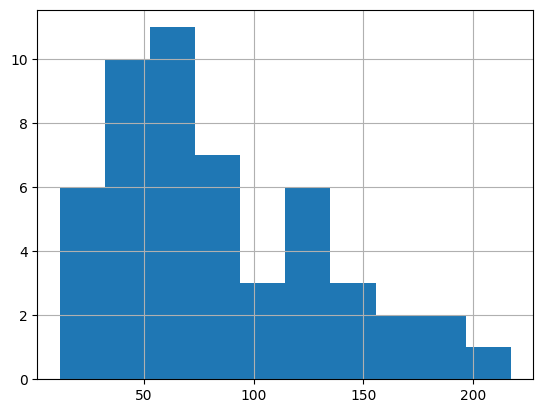

In [77]:
df_coches.speeding.hist();

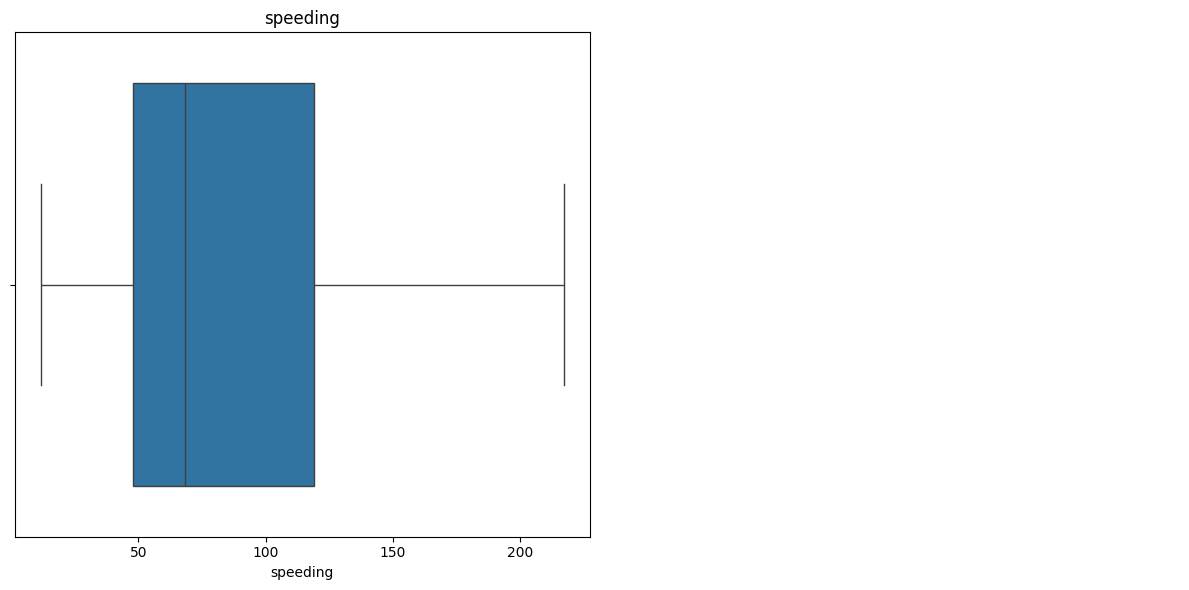

In [85]:
plot_multiple_boxplots(df_coches, ['speeding'])

In [87]:
# mis conclusiones son que los accidentes por exceso de velocidad están en el rango de 0 a 100 accidentes, 
# esos accidentes se repiten hasta en 10 estados

### Ejercicio 6

Analiza `alcohol` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [88]:
cv(df_coches['alcohol'])

std     49.507659
mean    83.121118
CV       0.595609
Name: alcohol, dtype: float64

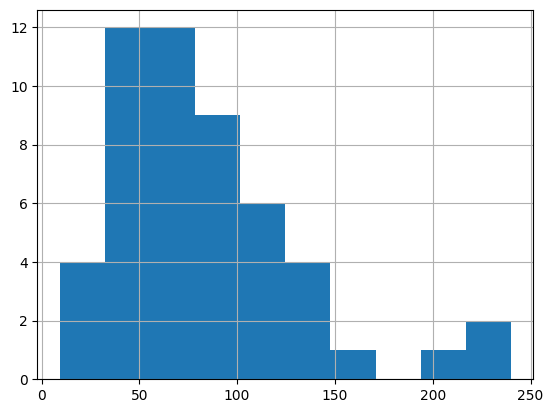

In [89]:
df_coches.alcohol.hist();

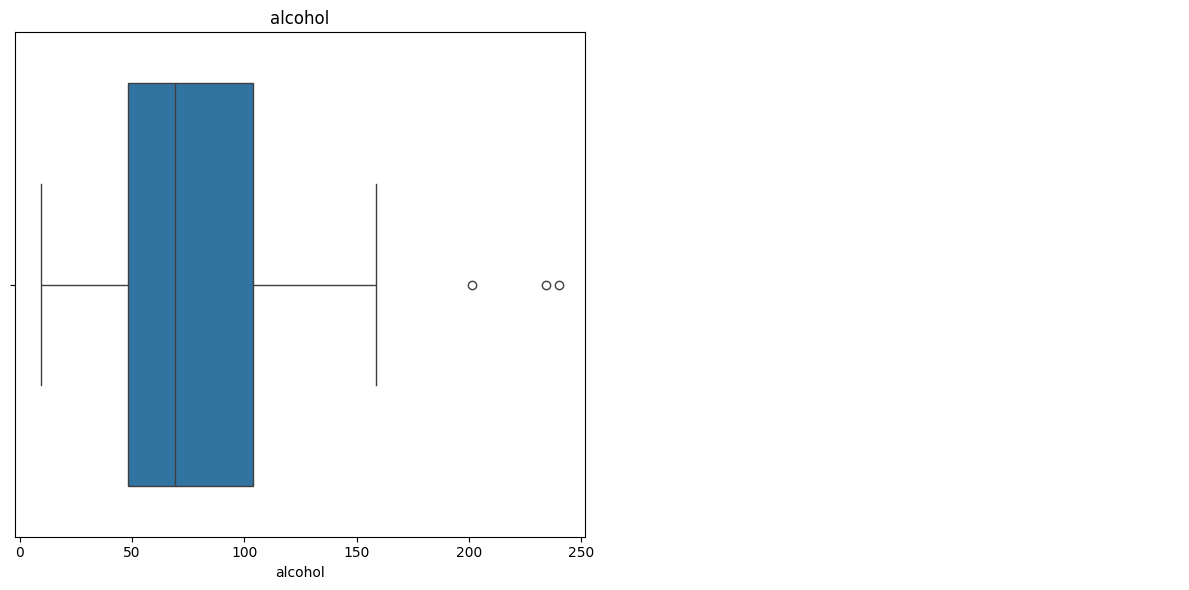

In [90]:
plot_multiple_boxplots(df_coches, ['alcohol'])

In [107]:
# Los accidentes por alcohol se centran entre 40-130, luego tenemos 3 estados entre 200 y 240 que estos no pueden suponer un outlier,
# Tendríamos que mirar que estados son, quizá estos accidentes están respaldados por alguna ley sobre el alcohol

In [111]:
df_coches.loc[df_coches['alcohol'] >= 200, ['abbrev', 'alcohol', 'no_previous', 'ins_premium', 'ins_losses']]

,abbrev,alcohol,no_previous,ins_premium,ins_losses
26,MT,201.5024,389.2660,816.21,85.15
34,ND,239.9082,491.2406,688.75,109.72
40,SC,234.1961,462.6801,858.97,116.29


### Ejercicio 7

Analiza `not_distracted` usando los valores obtenidos anteriormente, obten su CV (coeficiente de variación), su diagrama de caja y su histograma (muéstralos). ¿Qué puedes decir de la misma? [Nota: puedes utilizar la función `plot_combined_graphs`, del módulo `bootcampviztools`, que admite un dataframe, una lista de columnas, el ancho de los bigotes y el número de bines y muestra el histograma y el diagrama de caja]

In [113]:
cv(df_coches['not_distracted'])

std     129.111280
mean    229.402576
CV        0.562815
Name: not_distracted, dtype: float64

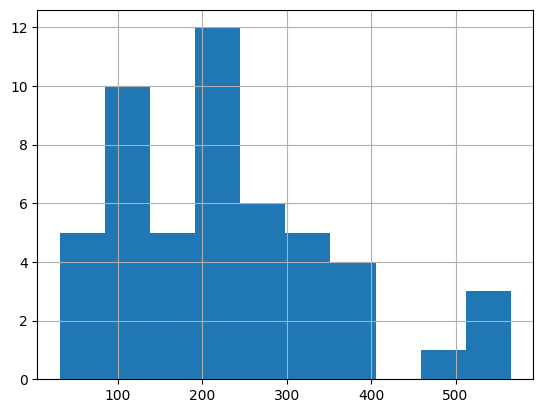

In [114]:
df_coches['not_distracted'].hist();

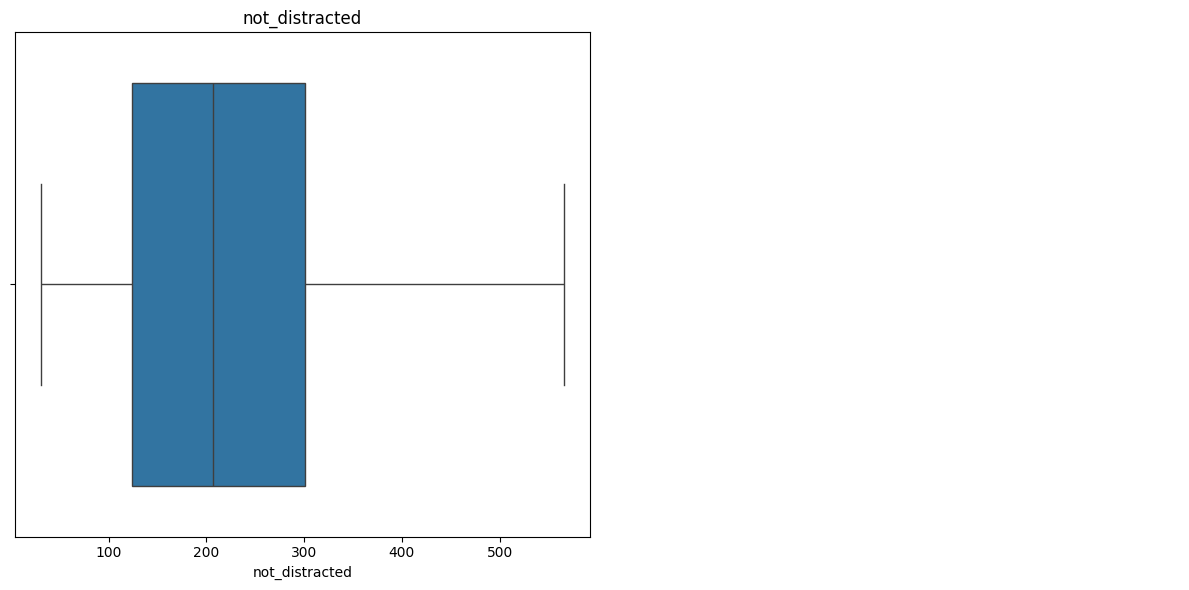

In [115]:
plot_multiple_boxplots(df_coches, ['not_distracted'])

In [116]:
#El histograma se podría partir en 2-3 trozos porque se ven dos bloques uno de 100 y otro en el 200 de accidentes
#Como se puede ver los datos se ven mas concetrados en la media que son esos 200.

### Ejercicio 8

El diagrma de violín es un tipo de gráfico que no hemos usado pero que tu puedes usar para tu análisis. Combina elementos de diagrama de caja y de la estimación de la función de densidad. 

Ejecuta la siguiente celda y luego dibuja el boxplot y el histograma combinado con la función de densidad para ver qué te parece más interesante. Usa `plot_combined_graphs`)

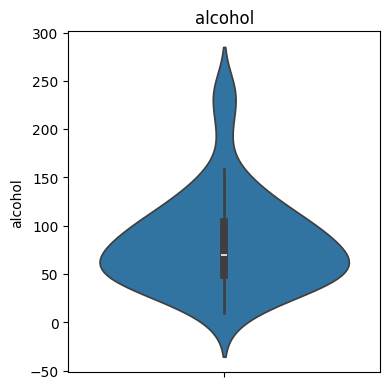

In [142]:
from bootcampviztools import mostrar_diagramas_violin

mostrar_diagramas_violin(df_coches, ["alcohol"])

La figura presenta un plotbox interno con la mediana marcada con una línea gruesa y el rango intercuartílico dibujado en el centro, además de que la forma se lo da la función densidad estimada (replicada simétricamente):

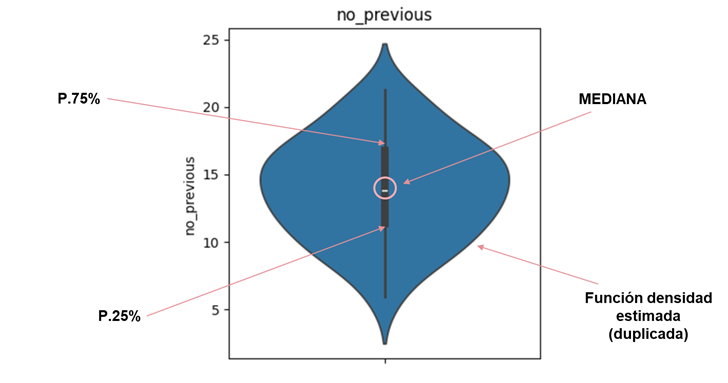

### Ejercicio 9

Completa el análisis de "no_previous" con su CV y sus medidas de tendencia central. ¿Qué destacarías? (considera gráficas y medidas obtenidas en este apartado)

In [137]:
cv(df_coches['no_previous'])

std     116.510959
mean    235.686873
CV        0.494346
Name: no_previous, dtype: float64

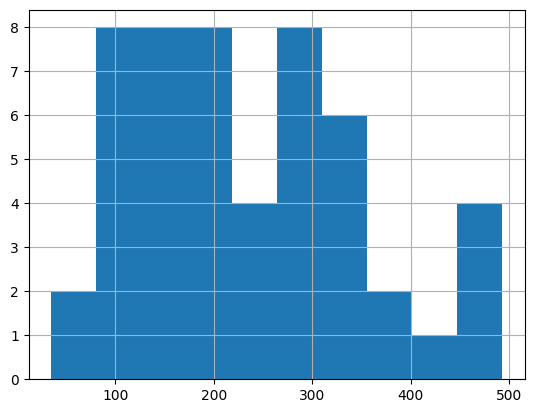

In [138]:
df_coches['no_previous'].hist();

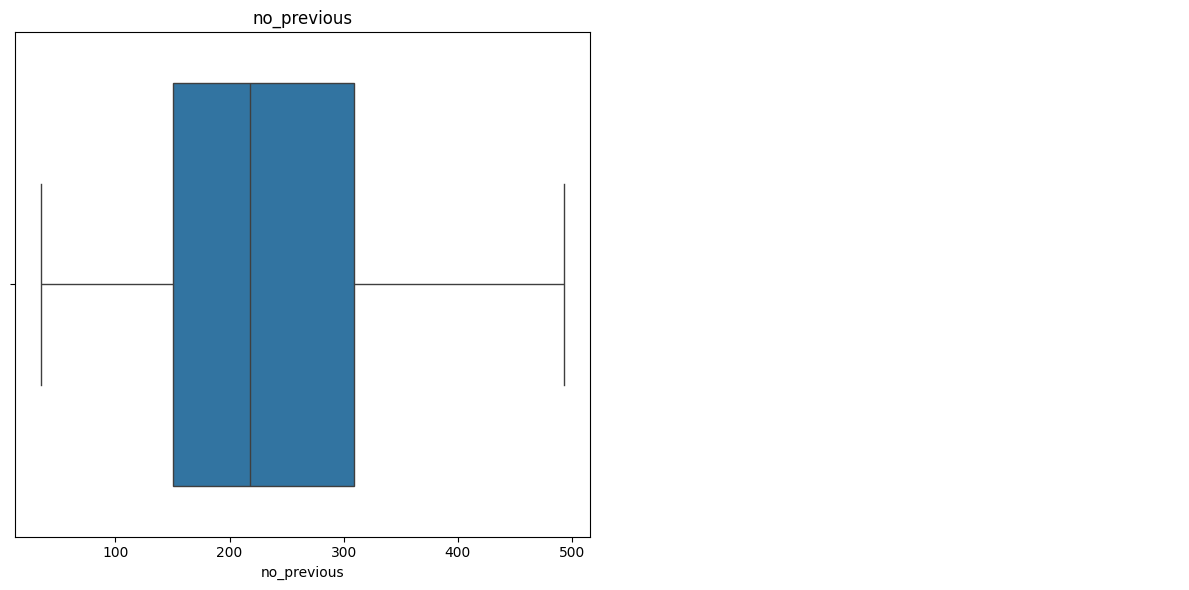

In [139]:
plot_multiple_boxplots(df_coches, ['no_previous'])

In [143]:
# Vemos que el histograma podría partirse en 2 o 3, los cuartiles Q1, Q3 están repartidos entre 150 y 300 accidentes 

### Ejercicio 10

Carga el dataset de los seguros ("./data/Marketing-Customer-Analysis.csv") en un datafame y pinta la gráfica de caja y el histograma de "customer_lifetime_value"

In [144]:
df_seguros = pd.read_csv('./data/Marketing-Customer-Analysis.csv')

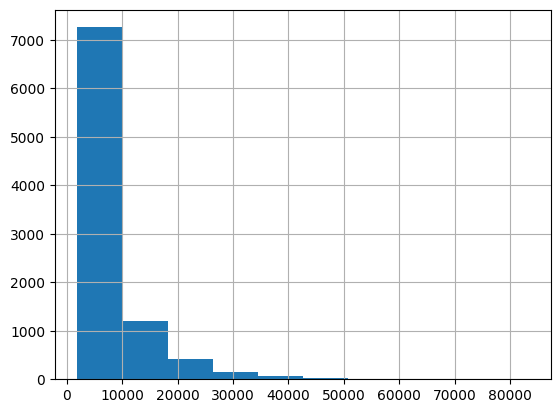

In [145]:
df_seguros.customer_lifetime_value.hist();

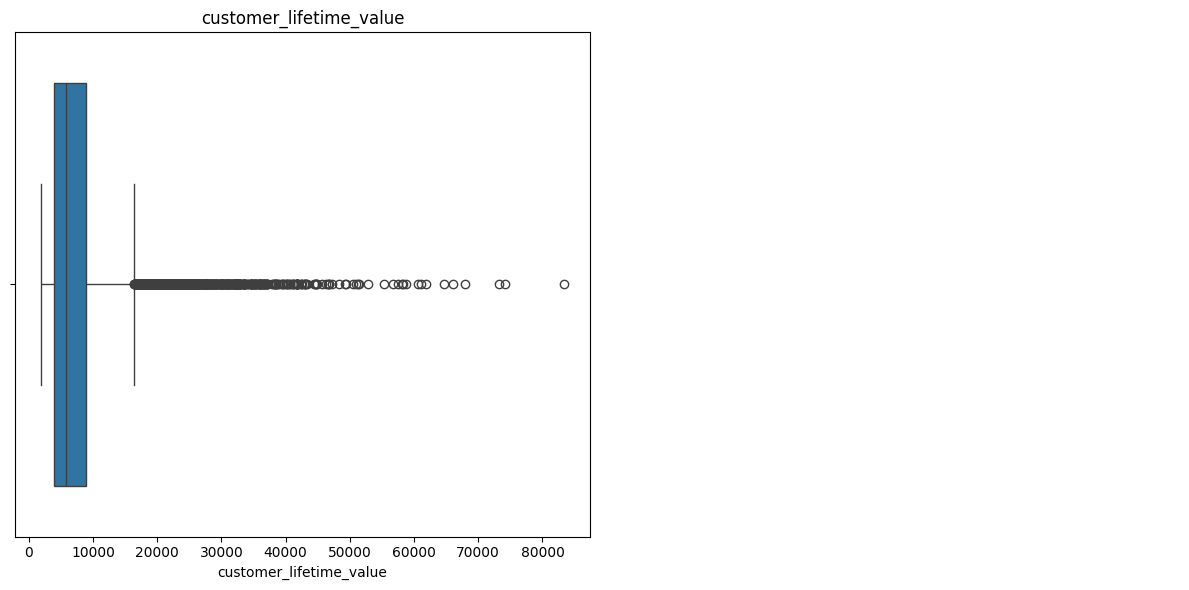

In [146]:
plot_multiple_boxplots(df_seguros, ['customer_lifetime_value'])

### Ejercicio 11

Para "customer_lifetime_value", escoge un umbral para marcar como outliers los valores que lo superen. Divide el dataframe en dos usando ese valor.

In [149]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

(2,)


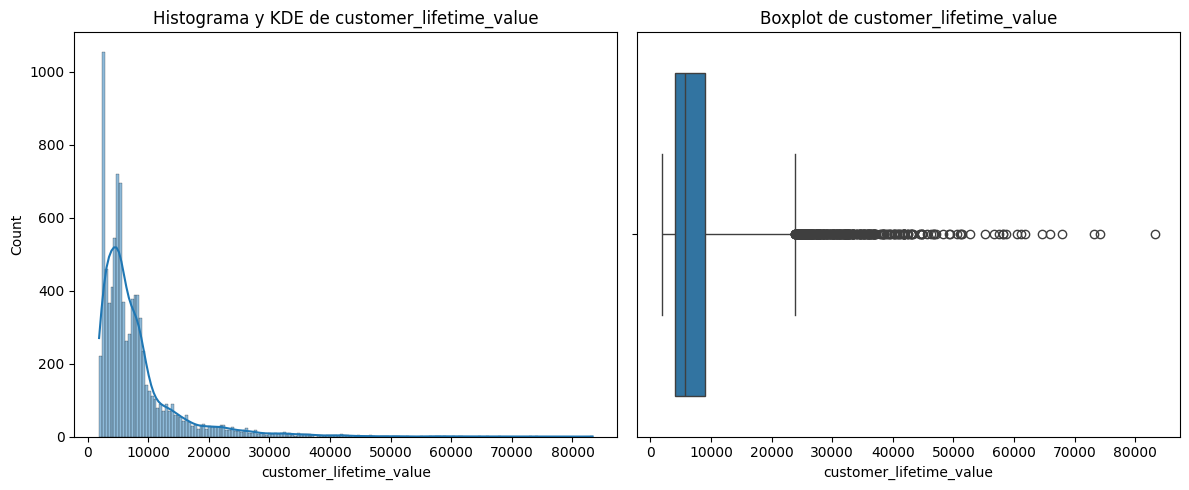

In [153]:
plot_combined_graphs(df_seguros, ['customer_lifetime_value'], whisker_width= 3)

### Ejericicio 12

Compara los histogramas para "customer_lifetime_value" de cada dataframe. ¿Qué conclusiones sacas?

In [187]:
df_menos_15k = df_seguros[df_seguros['customer_lifetime_value'] < 15000]
df_mayor_15k = df_seguros[df_seguros['customer_lifetime_value'] > 15000]

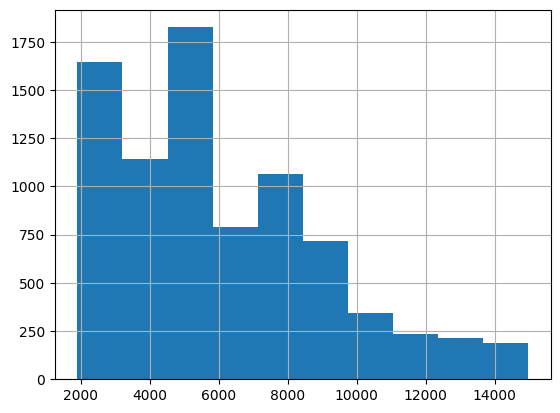

In [188]:
df_menos_15k['customer_lifetime_value'].hist();

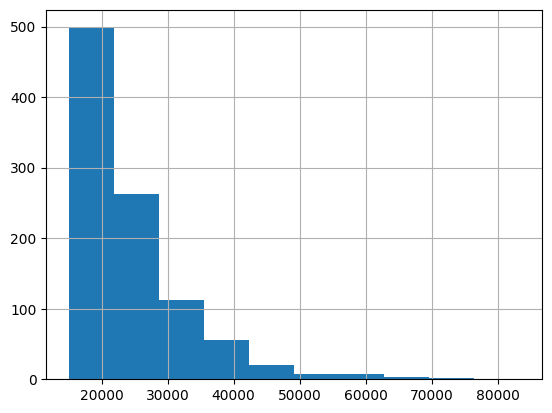

In [189]:
df_mayor_15k['customer_lifetime_value'].hist();

In [190]:
#Las conclusiones es que los datos están agrupados en el primer histograma, los datos están sesgados a la derecha, 
#lo que vemos es que la mayoría de clientes pertenecen al percentil 25%, y son clientes que pagan menos 